# ------------------------------ Tweeter Sentimental Analysis ---------------------------------

## Introduction :
Sentiment Analysis also called as opinion mining is a standard classification problem in the area of Natural Language processing. The idea behind this is to determine the polarity associated with the text as either positive or negative or sometime neutral (two-class or three-class classifications) for a specific topic. In this project, I plan to use the Sentiment140 Twitter datasets to learn and predict the sentiments of 1.6M tweets. 

## Business Case - 
To determine the polarity associated with the tweet as either positive or negative.

### Importing the libraries we need :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1',header=None)

### Creating a copy of data for backup :

In [3]:
df = data.copy()

In [4]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


### Renaming the columns :

In [5]:
df.columns = ['sentiment','id','date','flag','user','tweet']

In [6]:
df

,sentiment,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Basic checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


- sentiment : It represents the sentiment of the feedback.
- id : It represents id's.
- date : It contains the date and time when the tweet is made by the customer or user.
- flag : It tells about query asked by the customers.
- user : It contains usernames of the users.
- tweet : It contains tweets made by the users.

In [8]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [9]:
df.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

Here, 
- '0'  represents negative tweets.
- '4'  represents positive tweets.

From above we can see that the data is perfectly Balanced as negative and positive tweets are in the same quantity.

In [10]:
df.describe(include="O")

,date,flag,user,tweet
count,1600000,1600000,1600000,1600000
unique,774363,1,659775,1581466
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,20,1600000,549,210


Here we can observe that we have total 1.6 million rows while 6 columns. 
out of 6 columns only 2 columns are important here i.e. sentiment and tweet.
Here we have no null values but haves lot of duplicate values or tweets as we can see from less number of uniques in 'tweet' column. They should be dropped because they are providing us the same information.

In [11]:
df.drop(columns=df.loc[:,["date","id","flag","user"]], inplace=True)

In [12]:
df

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## Data Visualisation and Preprocessing :

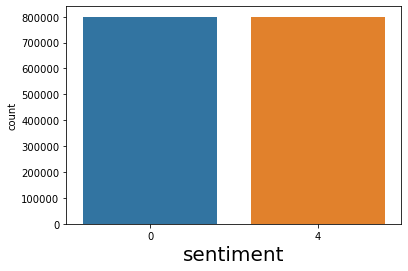

In [13]:
sns.countplot(df.sentiment)
plt.xlabel("sentiment",fontsize=20)
plt.show()

- No need to perform EDA.
- We have no null values or missing values.
- No imbalance in the data.
- No need to check correlation.
- But we need to remove the duplicate rows.
- Also we need to clean the data in the 'tweet' column.
- also need to convert "4" in sentiment column as "1" for normalizing target labels.

### Converting "4" as "1" in variable 'sentiment' :

In [14]:
df.loc[df["sentiment"]==4,"sentiment"] = 1

### Removing duplicates :

In [15]:
df.loc[np.where(df.duplicated()==True)]

,sentiment,tweet
1940,0,and so the editing of 3000 wedding shots begins
2149,0,"im lonely keep me company! 22 female, california"
3743,0,I'm not liking that new iTunes Pricing at all....
3746,0,"cant eat, drink or breath properly thanks to t..."
4163,0,has a cold
...,...,...
1599450,1,Good morning!
1599501,1,getting used to twitter
1599531,1,@KhloeKardashian Definitely my Mom. And Angeli...
1599678,1,goodmorning


In [16]:
tweet_unique = df.tweet.drop_duplicates(keep=False)

In [17]:
records_with_same_tweet = df[True ^ df.tweet.isin(tweet_unique)]
records_with_same_tweet

,sentiment,tweet
54,0,I need a hug
128,0,I'm so cold
213,0,Awwh babs... you look so sad underneith that s...
230,0,I still can't find my keys.
238,0,"im lonely keep me company! 22 female, california"
...,...,...
1599501,1,getting used to twitter
1599531,1,@KhloeKardashian Definitely my Mom. And Angeli...
1599678,1,goodmorning
1599768,1,Good morning everyone.


In [18]:
records_with_same_tweet[['sentiment','tweet']]

,sentiment,tweet
54,0,I need a hug
128,0,I'm so cold
213,0,Awwh babs... you look so sad underneith that s...
230,0,I still can't find my keys.
238,0,"im lonely keep me company! 22 female, california"
...,...,...
1599501,1,getting used to twitter
1599531,1,@KhloeKardashian Definitely my Mom. And Angeli...
1599678,1,goodmorning
1599768,1,Good morning everyone.


In [19]:
df = df[True ^ df.tweet.isin(records_with_same_tweet.tweet)]

In [20]:
df

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [21]:
df.sentiment.value_counts()

1    788715
0    784317
Name: sentiment, dtype: int64

Very little imbalance in the data happenned due to dropping of the duplicate rows. So, no need to handle this imbalance. keep it as it is.

### Creating a column to keep the count of the characters present in each record :

In [22]:
df["length"] = df["tweet"].apply(len)

In [23]:
df

,sentiment,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65


In [24]:
df.length.describe()

count    1.573032e+06
mean     7.459946e+01
std      3.612335e+01
min      6.000000e+00
25%      4.400000e+01
50%      7.000000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

In [25]:
3.740000e+02

374.0

In [26]:
df[df["length"]==374]["tweet"].iloc[0]

'@catfish_ohm à¹\x80à¸\x84à¹\x89à¸²à¹\x83à¸«à¹\x89à¸?à¸²à¸£à¹\x8cà¸\x95à¸¹à¸\x99à¸?à¸¸à¹\x82à¸£à¸°(à¸ªà¸±à¸ªà¹\x86+à¸¢à¸¹à¸£à¸´à¹?à¸?à¹\x84à¸\x94à¹\x89à¹?à¸\x97à¸\x99à¸\x99à¸°à¸\x9eà¸\xadà¸\x94à¸µà¸¡à¸´à¹\x82à¸?à¸°à¸«à¸§à¸\x87(à¸\x82à¸\x99à¸²à¸\x94à¹\x80à¸\x9fà¸´à¸\x99à¹?à¸?à¸¢à¸±à¸\x87à¹\x80à¸\x84à¸¢à¹\x83à¸«à¹\x89à¹\x84à¸¡à¹\x88à¹\x83à¸\x8aà¹\x88à¹\x80à¸«à¸£à¸\xad.à¹?à¸\x95à¹\x88à¸\x8aà¹\x88à¸²à¸\x87à¹\x80à¸«à¸\xadà¸°à¸£à¸²à¸¢à¸\x99à¸±à¹\x89à¸\x99à¹\x80à¸\x82à¸²à¹\x82à¸¡à¹\x80à¸\xadà¸°à¸?à¸§à¹\x88à¸²à¸\x9bà¸¥à¸²à¹?à¸¡à¸§à¹\x80à¸¢à¸\xadà¸° = '

### Removing punctuation :

In [27]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punct(text):
    text = "".join(char for char in text if char not in string.punctuation)
    return text
df["clean_text"] = df["tweet"].apply(lambda x: remove_punct(x))

In [29]:
df

,sentiment,tweet,length,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot httptwitpiccom2y1zl Awww thats a b...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his Facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,89,Kenichan I dived many times for the ball Manag...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no its not behaving at all im ...
...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56,Just woke up Having no school is the best feel...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78,TheWDBcom Very cool to hear old Walt intervie...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57,Are you ready for your MoJo Makeover Ask me fo...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65,Happy 38th Birthday to my boo of alll time Tup...


### Changing the text to lower case and removing the full stop from the text :

In [30]:
processed_docs = [doc.lower().replace(".","") for doc in df.clean_text]
df["processed_docs"] = processed_docs

In [31]:
df

,sentiment,tweet,length,clean_text,processed_docs
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,switchfoot httptwitpiccom2y1zl Awww thats a b...,switchfoot httptwitpiccom2y1zl awww thats a b...
1,0,is upset that he can't update his Facebook by ...,111,is upset that he cant update his Facebook by t...,is upset that he cant update his facebook by t...
2,0,@Kenichan I dived many times for the ball. Man...,89,Kenichan I dived many times for the ball Manag...,kenichan i dived many times for the ball manag...
3,0,my whole body feels itchy and like its on fire,47,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",111,nationwideclass no its not behaving at all im ...,nationwideclass no its not behaving at all im ...
...,...,...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,56,Just woke up Having no school is the best feel...,just woke up having no school is the best feel...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,78,TheWDBcom Very cool to hear old Walt intervie...,thewdbcom very cool to hear old walt intervie...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,57,Are you ready for your MoJo Makeover Ask me fo...,are you ready for your mojo makeover ask me fo...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,65,Happy 38th Birthday to my boo of alll time Tup...,happy 38th birthday to my boo of alll time tup...


### Splitting data :

In [32]:
X = df.processed_docs
y = df.sentiment

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words="english")

In [34]:
X = tv.fit_transform(X)

In [35]:
tv.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '0000000000',
 '00000001',
 '0000001',
 '0000014',
 '000009260gbs',
 '0000abcd',
 '0000ff',
 '0001',
 '0001110101001010000111',
 '0001am',
 '0001t',
 '0002',
 '0003',
 '0005',
 '00055',
 '00055gbmin',
 '0005am',
 '0005mm',
 '0006',
 '0007',
 '0009',
 '000aah',
 '000h',
 '000martha',
 '000month',
 '000oclock',
 '000quot',
 '000s',
 '000webhost',
 '001',
 '0010',
 '0010utc',
 '0010x0010',
 '0011000100101011001100010011110100110010',
 '0012',
 '0014',
 '0015',
 '0019',
 '001quot',
 '001sec',
 '002',
 '0020',
 '00202',
 '002345',
 '0029',
 '003',
 '0030',
 '0031',
 '0035',
 '0036',
 '003r',
 '003ï',
 '004',
 '0040',
 '0045',
 '0047',
 '0049',
 '005',
 '0050',
 '0051',
 '0054am',
 '0055',
 '005587',
 '0055gb60sec',
 '0056',
 '005603',
 '0058',
 '006',
 '0069',
 '007',
 '00711',
 '0074',
 '007episode',
 '007heather007',
 '007hil',
 '007jbond',
 '007louiseob',
 '007peter',
 '007wifey',
 '007wisdom',
 '008',
 '0084',
 '00ff00',
 '00fieldsy',
 '00g',
 '00ga',


In [36]:
len(tv.get_feature_names())

842076

## Splitting training and testing data :

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=56)

## Model Creation : 

In [38]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(alpha=0.01)
model = model.fit(X_train,y_train)
y_hat = model.predict(X_test)

In [39]:
y_hat

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

## Evaluating the model :

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75    156828
           1       0.76      0.73      0.74    157779

    accuracy                           0.75    314607
   macro avg       0.75      0.75      0.75    314607
weighted avg       0.75      0.75      0.75    314607



### confusion matrix :

In [42]:
pd.crosstab(y_test,y_hat)

col_0,0,1
sentiment,,
0,119602,37226
1,42161,115618


In [43]:
y_hat_train = model.predict(X_train)

In [44]:
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88    627489
           1       0.89      0.87      0.88    630936

    accuracy                           0.88   1258425
   macro avg       0.88      0.88      0.88   1258425
weighted avg       0.88      0.88      0.88   1258425



In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.78394432 0.77386411 0.76912222 0.78755765 0.77934673]
Cross validation Score: 0.7787670060330665
Std : 0.0066554688877706325


## Hyper-parameter tuning :

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    
grid = GridSearchCV(BernoulliNB(), param_grid, refit = True, verbose = 3, scoring='f1', cv=5)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........................alpha=0.1;, score=0.750 total time=   2.3s
[CV 2/5] END .........................alpha=0.1;, score=0.751 total time=   1.4s
[CV 3/5] END .........................alpha=0.1;, score=0.748 total time=   2.3s
[CV 4/5] END .........................alpha=0.1;, score=0.751 total time=   2.0s
[CV 5/5] END .........................alpha=0.1;, score=0.748 total time=   2.1s
[CV 1/5] END .........................alpha=0.2;, score=0.755 total time=   2.9s
[CV 2/5] END .........................alpha=0.2;, score=0.756 total time=   1.7s
[CV 3/5] END .........................alpha=0.2;, score=0.752 total time=   1.5s
[CV 4/5] END .........................alpha=0.2;, score=0.755 total time=   1.6s
[CV 5/5] END .........................alpha=0.2;, score=0.753 total time=   1.4s
[CV 1/5] END .........................alpha=0.3;, score=0.757 total time=   1.5s
[CV 2/5] END .........................alpha=0.3;

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1]},
             scoring='f1', verbose=3)

In [47]:
print(grid.best_estimator_,"\n",grid.best_params_)

BernoulliNB(alpha=1) 
 {'alpha': 1}


## Finally creating a model according to the best hyper parameters and training the model : 

In [48]:
model_hyp = BernoulliNB(alpha=1)
model_hyp = model_hyp.fit(X_train,y_train)
y_hat_hyp_test = model_hyp.predict(X_test)
y_hat_hyp_train = model_hyp.predict(X_train)

In [49]:
print(classification_report(y_train,y_hat_hyp_train))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84    627489
           1       0.85      0.82      0.84    630936

    accuracy                           0.84   1258425
   macro avg       0.84      0.84      0.84   1258425
weighted avg       0.84      0.84      0.84   1258425



In [50]:
print(classification_report(y_test,y_hat_hyp_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77    156828
           1       0.78      0.75      0.76    157779

    accuracy                           0.77    314607
   macro avg       0.77      0.77      0.77    314607
weighted avg       0.77      0.77      0.77    314607



## Checking predictions by giving some random inputs or texts to the trained model :

In [58]:
msg = input("Enter Message: ") # to get the input message
msgInput = tv.transform([msg]) # 
predict = model_hyp.predict(msgInput)
predict
if (predict[0]==0):
    print("------------------------Negative tweet---------------------------")
else:
    print("---------------------------Positive tweet------------------------------")

Enter Message: Thanks for watching !
---------------------------Positive tweet------------------------------


## Conclusion :

- Here we got a 77% accuracy on test data which is pretty good.
- We can improve this accuracy to more by performing more data cleaning operation which are as follows : 

1) Replace contractions with complete phrases (e.g.: "I'll" with "I will").

2) Expand Abbreviations and other urban lingos.

# ---------------------------------------Thank You !----------------------------------------------